In [1]:
import os, sys, string, time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from platform import python_version
import scipy
from scipy import stats
import math
from matplotlib.patches import Rectangle
import joblib
from datetime import date

import Utilities.Plotter as PT
import Utilities.Constants as Constants
import Utilities.Functions as Functions
import Utilities.Variables_list as Var_list
from Utilities.ipython_exit import exit

print ('Success')


Success


## Reading limit .csvs

In [3]:
samples = ["SIN","PIENU","KEK","E949"] #"PS191"
print("Plotting these limits: " + str(samples))
plot_dict = {}
for sample in samples:
    plot_dict[sample] = Functions.Pandafy(Constants.limit_locs[sample])

#-----MY CURRENT observed limits-----#
uboone_ee_obs = Functions.Pandafy('limit_files/Brazil_plot/obs_limit_ee_21_April.csv')
uboone_pi0_obs = Functions.Pandafy('limit_files/Brazil_plot/obs_limit_pi0_21_April.csv')
uboone_ee_Finished = Functions.Pandafy('limit_files/My_limits/Full_sys_full_hist_Finished_ee_23_May.csv')

#-----MY EXPECTED limits, other uboone limits-----#
uboone_ee_current = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_20_April.csv')

uboone_ee_run1 = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_FINAL_run1.csv')
uboone_ee_run3 = Functions.Pandafy('limit_files/My_limits/Full_sys_4_bins_expected_mu_FINAL_run3.csv')

Ten_event_limit = Functions.Pandafy('limit_files/My_limits/10_event_expected_mu_run3.csv')

uboone_ee_old = Functions.Pandafy('limit_files/My_limits/Pre_scaled_limit.csv')

uboone_mupi = Functions.Pandafy('limit_files/uboone_mupi.csv')

#-----Other non-uboone limits/projections-----#
PS191_Dirac = Functions.Pandafy('limit_files/PS191_1988.csv')
T2K_observed = Functions.Pandafy('limit_files/T2K_Umu4_observed_2019.csv')
NA62_observed = Functions.Pandafy('limit_files/NA62_limit.csv')
Theorist_Pawels = Functions.Pandafy('limit_files/Reinterp_Pawels_result.csv')
T2K_recast = Functions.Pandafy('limit_files/T2K_recast_full_data.csv')
Wrong_PS191_K = Functions.Pandafy('limit_files/PS191_ee_reinterp_NC_2005.csv')
Wrong_PS191_pion = Functions.Pandafy('limit_files/PS191_pion_ee_reinterp_NC_2005.csv')
PS191_redone_2022 = Functions.Pandafy('limit_files/Nicolo_redone_PS191.csv')
BBN = Functions.Pandafy('limit_files/BBN_Nicolo_paper.csv')

point = [150,4.26974152748967e-07]


Plotting these limits: ['SIN', 'PIENU', 'KEK', 'E949']


## Plotting limits < 250MeV

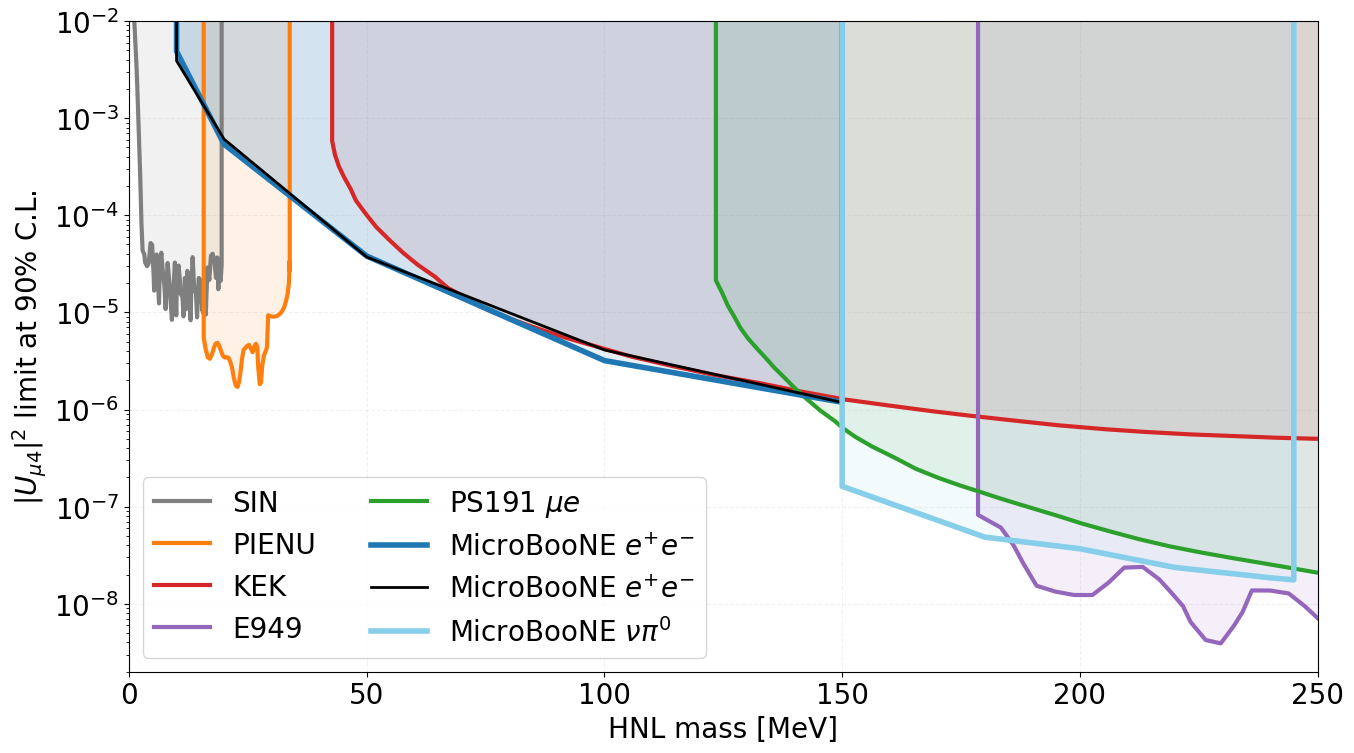

In [4]:
#----MAJORANA----#
#Only the beam dump searches change the limit for Majorana. 
style_ps = '-'
style_ds = '-'
transp = 0.05

savefig = False
Plot_Dirac_and_Maj = False

plt.figure(figsize=(14,8),facecolor='white',dpi=100)

Maj_factor = 1/(np.sqrt(2))

#Could loop over a dict (saved in constants) of other relevant limits
for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)
    
plt.plot(PS191_Dirac['Mass'],PS191_Dirac['Value']*Maj_factor,label=r"PS191 $\mu e$",color="C2",lw=3)
plt.fill_between(PS191_Dirac['Mass'],PS191_Dirac['Value']*Maj_factor,1,color="C2",alpha=0.1)

plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label=r"MicroBooNE $e^{+}e^{-}$",color="C10",lw=4)
plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="skyblue",alpha=0.1)

Dirac_ee_scale = 0.6
Dirac_pi0_scale = 0.34
if Plot_Dirac_and_Maj==True:
    plt.plot(PS191_Dirac['Mass'],PS191_Dirac['Value'],label=r"PS191 Dirac $\mu e$",color="C2",lw=3, linestyle="dashed")
    plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value']/Dirac_ee_scale,label=r"MicroBooNE Dirac $e^{+}e^{-}$",color="C10",lw=4, linestyle="dashed")
    plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value']/Dirac_pi0_scale,label=r"MicroBooNE Dirac $\nu\pi^{0}$",color="skyblue",lw=4, linestyle="dashed")

# plt.plot(PS191_redone_2022['Mass'],PS191_redone_2022['Value'],label=r"PS191 Redone $e e$",color="black",lw=3, linestyle="dashed")
# plt.plot(Wrong_PS191_K['Mass'],Wrong_PS191_K['Value'],label=r"PS191 original $e e$",color="red",lw=3, linestyle="dashed")
# plt.plot(T2K_recast['Mass'],T2K_recast['Value'],label=r"T2K Recast",color="black",lw=3, linestyle="dashed")
# lower_lim_BBN = np.full(101, 1e-8)

plt.xlabel('HNL mass [MeV]',fontsize=20)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=20)
plt.legend()
plt.ylim(2e-9,1e-2)
plt.xlim(0.00,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20}, loc="lower left",ncol=2)
plt.tight_layout()

today = date.today()
d1 = today.strftime("%d_%m")

if savefig == True:
    name = f"limit_{d1}"
    if Plot_Dirac_and_Maj==True: name += "Majorana_and_Dirac"
    else: name += "Majorana"
    plt.savefig('plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


In [ ]:
#----DIRAC----#
#Only the beam dump searches change the limit for Majorana. 
style_ps = '-'
style_ds = '-'
transp = 0.05

savefig = True
Plot_Dirac_and_Maj = False

plt.figure(figsize=(14,8),facecolor='white',dpi=100)

Maj_factor = 1/(np.sqrt(2))
Dirac_ee_scale = 0.6
Dirac_pi0_scale = 0.34

#Could loop over a dict (saved in constants) of other relevant limits
for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)
    
plt.plot(PS191_Dirac['Mass'],PS191_Dirac['Value'],label=r"PS191 $\mu e$",color="C2",lw=3)
plt.fill_between(PS191_Dirac['Mass'],PS191_Dirac['Value'],1,color="C2",alpha=0.1)

plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value']/Dirac_ee_scale,label=r"MicroBooNE $e^{+}e^{-}$",color="C10",lw=4)
plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value']/Dirac_ee_scale,1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value']/Dirac_pi0_scale,label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value']/Dirac_pi0_scale,1,color="skyblue",alpha=0.1)

# if Plot_Dirac_and_Maj==True:
#     plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value']/Dirac_ee_scale,label=r"MicroBooNE $e^{+}e^{-}$",color="C10",lw=4, linestyle="dashed")
#     plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value']/Dirac_pi0_scale,label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4, linestyle="dashed")
    
# lower_lim_BBN = np.full(101, 1e-8)

plt.xlabel('HNL mass [MeV]',fontsize=20)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=20)
plt.legend()
plt.ylim(2e-9,1e-2)
plt.xlim(0.00,250)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20}, loc="lower left",ncol=2)
plt.tight_layout()

today = date.today()
d1 = today.strftime("%d_%m")

if savefig == True:
    name = f"limit_{d1}_Dirac"
    plt.savefig('plots/Limits/'+name+'.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/'+name+'.png',bbox_inches='tight', pad_inches=0.3)
plt.show()

## Plotting FULL MicroBooNE limit

In [ ]:
plt.figure(figsize=(14,8),facecolor='white',dpi=100)

savefig=False

for sample in samples:
    plt.plot(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],label=sample, color=Constants.limit_colours[sample], lw=3)
    plt.fill_between(plot_dict[sample]['Mass'], plot_dict[sample]['Value'],1,color=Constants.limit_colours[sample],alpha=0.1)
    
plt.plot(T2K_observed['Mass'],T2K_observed['Value'],label=r"T2K",color="C15",lw=3)
plt.fill_between(T2K_observed['Mass'],T2K_observed['Value'],1,color="C15",alpha=0.1)

plt.plot(NA62_observed['Mass'],NA62_observed['Value'],label=r"NA62",color="C16",lw=3)
plt.fill_between(NA62_observed['Mass'],NA62_observed['Value'],1,color="C16",alpha=0.1)
    
plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label=r"MicroBooNE $\nu e^{+}e^{-}$",color="C10",lw=4)
plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="skyblue",alpha=0.1)

plt.plot(uboone_mupi['Mass'],uboone_mupi['Value'],label=r"MicroBooNE $\mu\pi$",color="darkblue",lw=4)
plt.fill_between(uboone_mupi['Mass'],uboone_mupi['Value'],1,color="darkblue",alpha=0.1)

plt.xlabel('HNL mass [MeV]',fontsize=22)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=22)
plt.ylim(1e-9,6e-3)
plt.xlim(0.00,400)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 16}, loc="lower left",ncol=2)
plt.tight_layout()


if savefig == True:
    name = f"limit_{d1}"
    plt.savefig('plots/Limits/ALL_comparison.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/ALL_comparison.png',bbox_inches='tight', pad_inches=0.3)
plt.show()

In [ ]:
#Just plotting uboone limits
plt.figure(figsize=(14,8),facecolor='white',dpi=100)

savefig=True

plt.plot(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],label=r"MicroBooNE $\nu e^{+}e^{-}$",color="C10",lw=4)
plt.fill_between(uboone_ee_obs['Mass'],uboone_ee_obs['Value'],1,color="C10",alpha=0.1)

plt.plot(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],label=r"MicroBooNE $\nu\pi^{0}$",color="skyblue",lw=4)
plt.fill_between(uboone_pi0_obs['Mass'],uboone_pi0_obs['Value'],1,color="skyblue",alpha=0.1)

plt.plot(uboone_mupi['Mass'],uboone_mupi['Value'],label=r"MicroBooNE $\mu\pi$",color="darkblue",lw=4)
plt.fill_between(uboone_mupi['Mass'],uboone_mupi['Value'],1,color="darkblue",alpha=0.1)

plt.xlabel('HNL mass [MeV]',fontsize=22)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=22)
# plt.ylim(1e-8,1e-3)
plt.ylim(1e-9,6e-3)
#plt.xlim(0,0.45)
plt.xlim(0.00,400)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20}, loc="lower left",ncol=1)
plt.tight_layout()

if savefig == True:
    name = f"limit_{d1}"
    plt.savefig('plots/Limits/Just_uboone.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/Just_uboone.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


In [ ]:
#Plotting just KEK
plt.figure(figsize=(14,8),facecolor='white',dpi=100)

savefig=True

KEK_1982 = Functions.Pandafy('limit_files/KEK_1982.csv')
KEK_1984_combined = Functions.Pandafy('limit_files/KEK_1984_E89_plus_E104.csv')
KEK_1984_E104 = Functions.Pandafy('limit_files/KEK_1984_E104.csv')
FIPS_KEK = Functions.Pandafy('limit_files/FIPS_KEK_new.csv')

plt.plot(KEK_1982['Mass'],KEK_1982['Value'],label=r"KEK 1982",color="C10",lw=2)

plt.plot(KEK_1984_E104['Mass'],KEK_1984_E104['Value'],label=r"KEK 1984 E104",color="C11",lw=2)

plt.plot(KEK_1984_combined['Mass'],KEK_1984_combined['Value'],label=r"KEK 1984 combined",color="C12",lw=2)

plt.plot(FIPS_KEK['Mass'],FIPS_KEK['Value'],label=r"FIPS KEK",color="black",lw=3)

plt.xlabel('HNL mass [MeV]',fontsize=22)
plt.ylabel(r'$|U_{\mu 4}|^2$ limit at 90% C.L.',fontsize=22)
plt.ylim(1e-7,6e-3)
plt.xlim(20,200)
plt.grid(ls='--',color='C7',alpha=0.1)
plt.yscale('log')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.legend(prop={'size': 20}, loc="lower left",ncol=1)
plt.tight_layout()

if savefig == True:
    name = f"limit_{d1}"
    plt.savefig('plots/Limits/KEK_comparison.pdf',bbox_inches='tight', pad_inches=0.3)
    plt.savefig('plots/Limits/KEK_comparison.png',bbox_inches='tight', pad_inches=0.3)
plt.show()


## Calculating ratios of limits

In [ ]:
# plt.figure(figsize=(14,8),facecolor='white',dpi=100)
def get_interpolated_vals(x, y, x_vals_wanted):
    y_interp = np.interp(x_vals_wanted, x, y)

    return y_interp

def get_ratio(arr1,arr2):
    ratio = np.divide(np.array(arr1), np.array(arr2))
    return ratio

masses = np.arange(50,200, 5)
print(masses)

FIPS = np.array(FIPS_KEK['Value'])
KEK_combined = np.array(KEK_1984_combined['Value'])

KEK_inter = get_interpolated_vals(KEK_1984_combined['Mass'], KEK_1984_combined['Value'], masses)
FIPS_inter = get_interpolated_vals(FIPS_KEK['Mass'], FIPS_KEK['Value'], masses)

ratio = np.divide(KEK_inter, FIPS_inter)
print(ratio)


In [ ]:
savefigs=True

plt.figure(figsize=(10,6))
plt.plot(masses,ratio, lw=3, label="Ratio")

plt.axhline(1.0, color="black", linestyle="dashed")

plt.xlabel("Mass [MeV]")
plt.ylabel("KEK 1984/FIPS limit")
plt.legend()

# plt.yscale("log")

plt.tight_layout()

if savefigs == True:
    plt.savefig("plots/Limits/Other_limits/Ratio_FIPS_KEK.png")
    plt.savefig("plots/Limits/Other_limits/Ratio_FIPS_KEK.pdf")

In [ ]:
print(BBN['Value'])
print(type(BBN))
lower_lim = np.full(101, 1e-8)